In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.

We are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 player per group.



#### winPlacePerc - Parameters
  
Let's talk about availabe feature in the given PubG Data.(source:Kaggle)

Data fields

**DBNOs** - Number of enemy players knocked.

**assists** - Number of enemy players this player damaged that were killed by teammates.

**boosts** - Number of boost items used.

**damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.

**headshotKills** - Number of enemy players killed with headshots.

**heals** - Number of healing items used.

**Id** - Player’s Id

**killPlace** - Ranking in match of number of enemy players killed.

**killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

**killStreaks** - Max number of enemy players killed in a short amount of time.

**kills** - Number of enemy players killed.

**longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

**matchDuration** - Duration of match in seconds.

**matchId** - ID to identify match. There are no matches that are in both the training and testing set.

**matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

**rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

**revives** - Number of times this player revived teammates.

**rideDistance** - Total distance traveled in vehicles measured in meters.

**roadKills** - Number of kills while in a vehicle.

**swimDistance** - Total distance traveled by swimming measured in meters.

**teamKills** - Number of times this player killed a teammate.

**vehicleDestroys** - Number of vehicles destroyed.

**walkDistance** - Total distance traveled on foot measured in meters.

**weaponsAcquired** - Number of weapons picked up.

**winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

**groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

**numGroups** - Number of groups we have data for in the match.

**maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

**winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [7]:
#Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [8]:
#Importing the dataset
data = pd.read_csv("C:\\Users\\ccuti\\Data Science\\pubg.csv")

In [9]:
#getting informtaion regarding float, int or object type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [11]:
#checking for missing values
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [12]:
#Checking for the missing data in WinPlacePerc
data[data.winPlacePerc.isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [13]:
#Dropping the single missing value column from WinPlacePerc
data.drop(2744604,inplace=True)

### EDA
#### With respect to different MatchType

Text(0.5, 1.0, 'kills for different matches')

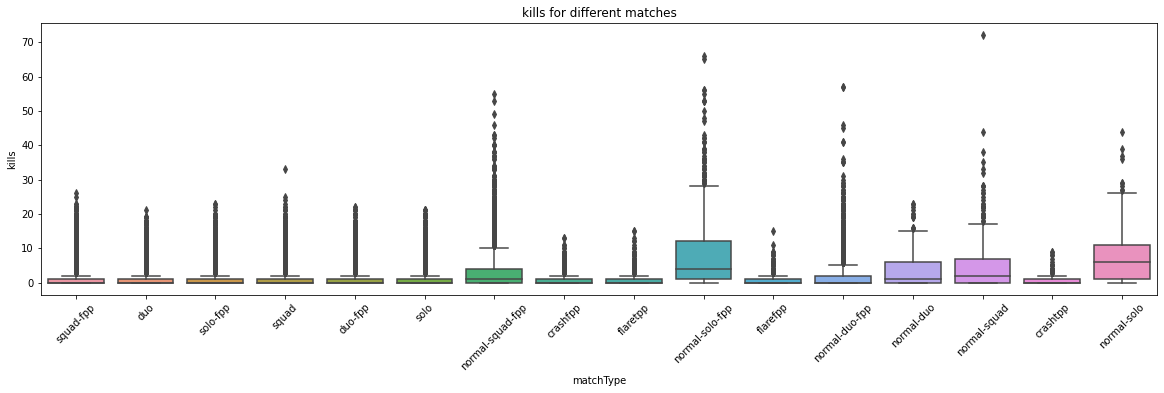

In [15]:
#Plotting box plot between different match type and kills
fig, axes = plt.subplots(figsize=(20,5))
sns.boxplot(y='kills', x='matchType', data=data, ax= axes)
plt.xticks(rotation=45)
plt.title('kills for different matches')

Text(0.5, 1.0, 'Frequecy of different types of match')

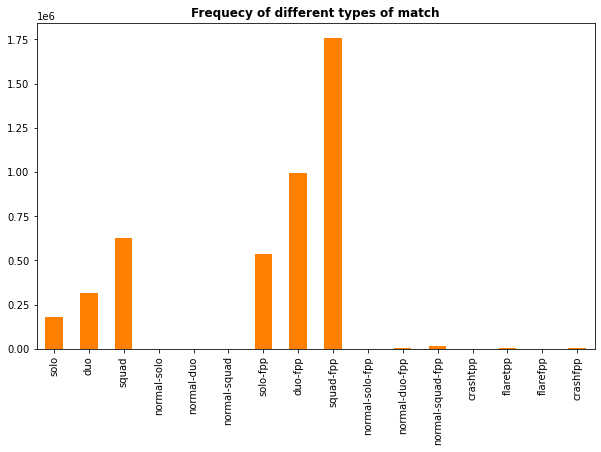

In [16]:
# Frequecy of different types of match
matchTypes = ["solo", "duo", "squad", "normal-solo", "normal-duo", "normal-squad", "solo-fpp", "duo-fpp", "squad-fpp", "normal-solo-fpp", "normal-duo-fpp", "normal-squad-fpp", "crashtpp", "flaretpp", "flarefpp", "crashfpp"]
data["matchType"].value_counts()[matchTypes].plot(kind="bar", figsize=(10,6), color="#ff8000")
plt.title("Frequecy of different types of match", fontweight="bold")

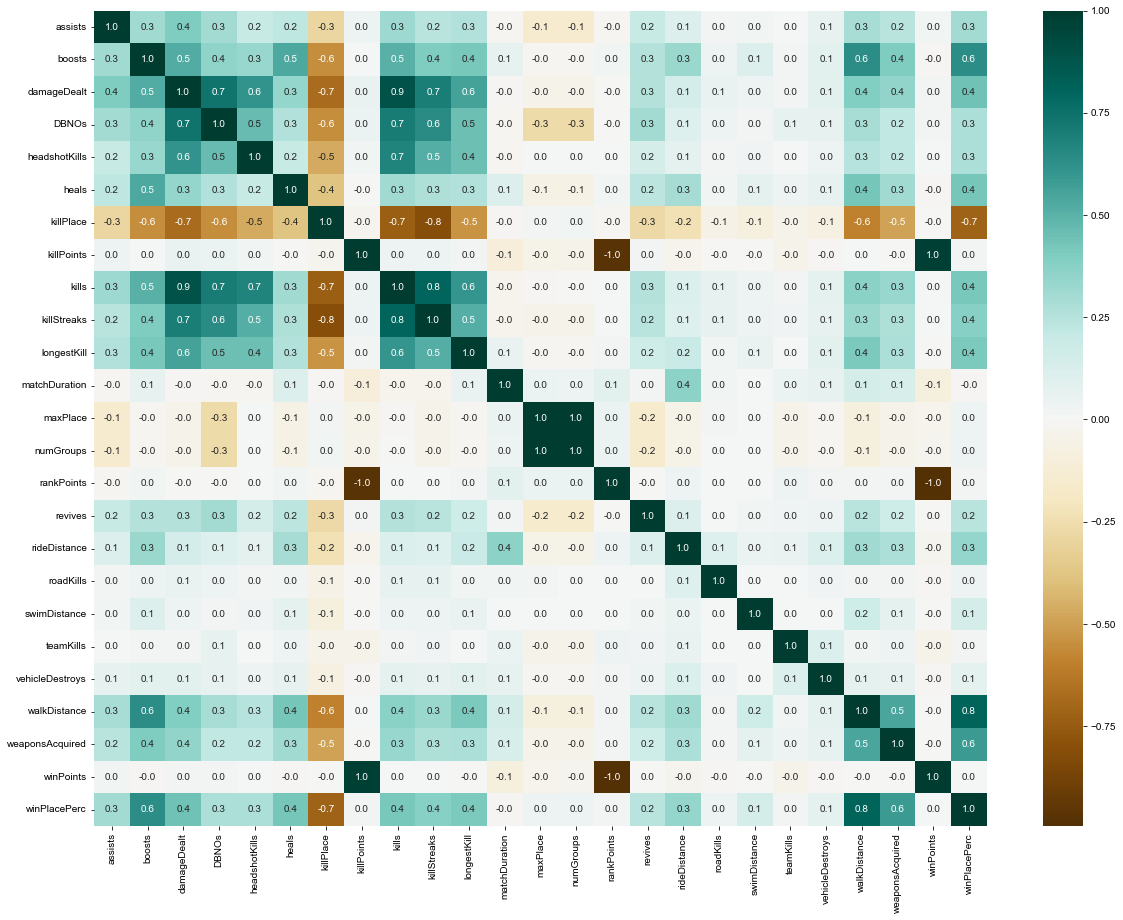

In [17]:
#Checking the correlation between all the attributes
corr = data.corr()
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

winPlacePerc is our to be predicted value. The features with the highest linear correlation are
walkDistance (0.81) killPlace (-0.71) boosts (0.62) weaponsAcquired (0.57) damageDealt (0.44)

## Dealing with outliers and Data Preprocessing
#### Checking for distance and total distance with respect to number of kills
Analysing the walk distance traveled, there are 3 ways to do so
- rideDistance
- walkDistance
- swimDistance

C:\Users\ccuti\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


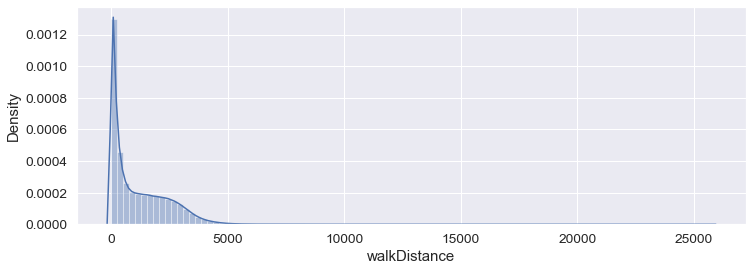

(498, 29)

In [19]:
#riding distance
plt.figure(figsize=(12,4))
sns.distplot(data['walkDistance'], bins=100)
plt.show()

data[data['rideDistance']>=15000].shape

In [21]:
data.drop(data[data['rideDistance']>15000].index, inplace=True)

C:\Users\ccuti\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


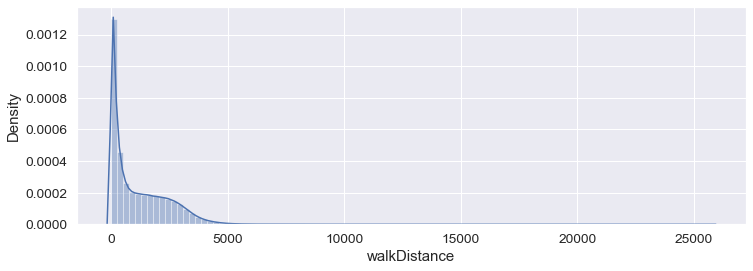

(219, 29)

In [22]:
#Walk Distance
plt.figure(figsize=(12,4))
sns.distplot(data['walkDistance'], bins=100)
plt.show()

data[data['walkDistance']>=10000].shape

In [25]:
#walk distance greater that 1km (10000m) will be dropped
data.drop(data[data['walkDistance']>=10000].index,inplace=True)

C:\Users\ccuti\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(138, 29)

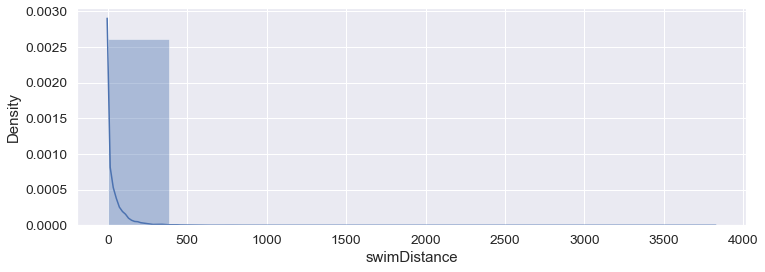

In [36]:
#Swim distance
plt.subplots(figsize=(12, 4))
sns.distplot(data.swimDistance,bins=10)
data[data['swimDistance']>=1000].shape

In [38]:
#swin distance greater than 1000m will be dropped
data.drop(data[data['swimDistance']>=1000].index,inplace=True)

#### Kills with respect to total distance

In [51]:
#To find the total distance travelled
data['total_distance']=data.rideDistance+data.walkDistance+data.swimDistance
print(data.total_distance)
# checking for kills without moving
data['killsWithoutMoving'] = ((data['kills'] > 0) & (data['total_distance'] == 0))
# find the count.
data['killsWithoutMoving'].value_counts()

0           244.8000
1          1445.0445
2           161.8000
3           202.7000
4            49.7500
             ...    
4446961    2311.0000
4446962      81.7000
4446963     790.8840
4446964    2748.0000
4446965    2613.0000
Name: total_distance, Length: 4446111, dtype: float64


False    4444576
True        1535
Name: killsWithoutMoving, dtype: int64

In [52]:
#dropping those values which are true for kills without moving
data.drop(data[data['killsWithoutMoving'] == True].index, inplace=True)

#### with respect to Roadkills

In [54]:
#checking value_counts for Roadkills
data['roadKills'].value_counts()

0     4431617
1       11215
2        1293
3         297
4          72
5          36
6          20
7          11
8           7
9           2
11          2
10          2
14          1
18          1
Name: roadKills, dtype: int64

In [55]:
#the roadlkills usually between 0-13, thus above that are the anomalies which will be dropped
data.drop(data[data['roadKills']>=10].index,inplace=True)

#### with respect to Total Kills

In [57]:
#checking the value_counts for total kills
data['kills'].value_counts()

0     2529158
1      927505
2      472225
3      232238
4      124397
5       66475
6       37861
7       21739
8       12713
9        7580
10       4562
11       2756
12       1726
13       1107
14        742
15        468
16        319
17        225
18        159
19        105
20         94
22         74
21         61
23         40
24         39
26         24
25         24
28         22
27         15
33         12
29         11
31         11
30         11
38          6
35          6
36          6
34          5
41          5
37          5
39          4
32          4
40          4
53          4
42          3
56          2
44          2
55          2
57          2
43          2
46          2
66          1
50          1
65          1
48          1
47          1
45          1
49          1
72          1
Name: kills, dtype: int64

In [59]:
#dropping columns with kills more than 35
data.drop(data[data['kills'] >=35].index, inplace=True)


#### with respect to weapons acquired

C:\Users\ccuti\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


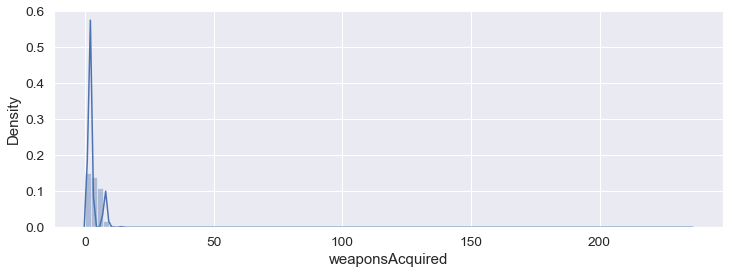

In [60]:
#plot to check 
plt.figure(figsize=(12,4))
sns.distplot(data['weaponsAcquired'], bins=100)
plt.show()

In [67]:
data[data.weaponsAcquired>=50].shape

(137, 31)

C:\Users\ccuti\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0, 31)


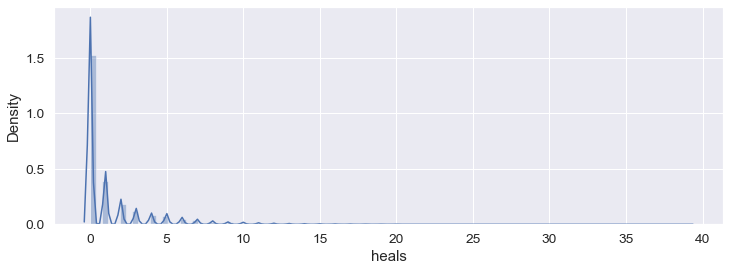

In [73]:
#dropping data with more than 50 weapons acquired
plt.figure(figsize=(12,4))
sns.distplot(data['heals'], bins=100)
#to check the shape and the number
print(data[data.heals>=40].shape)



In [72]:
data.drop(data[data.heals>=40].index,inplace=True)

### Dealing with Categorical Variables

In [74]:
print(data.select_dtypes(include='object').describe().columns.tolist())

['Id', 'groupId', 'matchId', 'matchType']


In [77]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['matchType']= label_encoder.fit_transform(data['matchType']) 

In [78]:

data['matchType']

0          15
1          15
2           2
3          15
4          13
           ..
4446961    15
4446962    12
4446963    15
4446964    15
4446965    13
Name: matchType, Length: 4444372, dtype: int64

In [80]:
data['matchType'].value_counts()

15    1755887
3      996501
14     626430
13     536350
2      313534
12     181787
11      16205
0        6286
7        5401
5        2505
9        1476
4         718
10        451
1         371
8         277
6         193
Name: matchType, dtype: int64

In [81]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'total_distance',
       'killsWithoutMoving'],
      dtype='object')

In [83]:
#dropping unnecessary columns which are present and which were created for finding outliers
data.drop(columns=['killsWithoutMoving', 
                   'total_distance', 
                   'Id',
                   'groupId',
                   'matchId'], inplace=True)

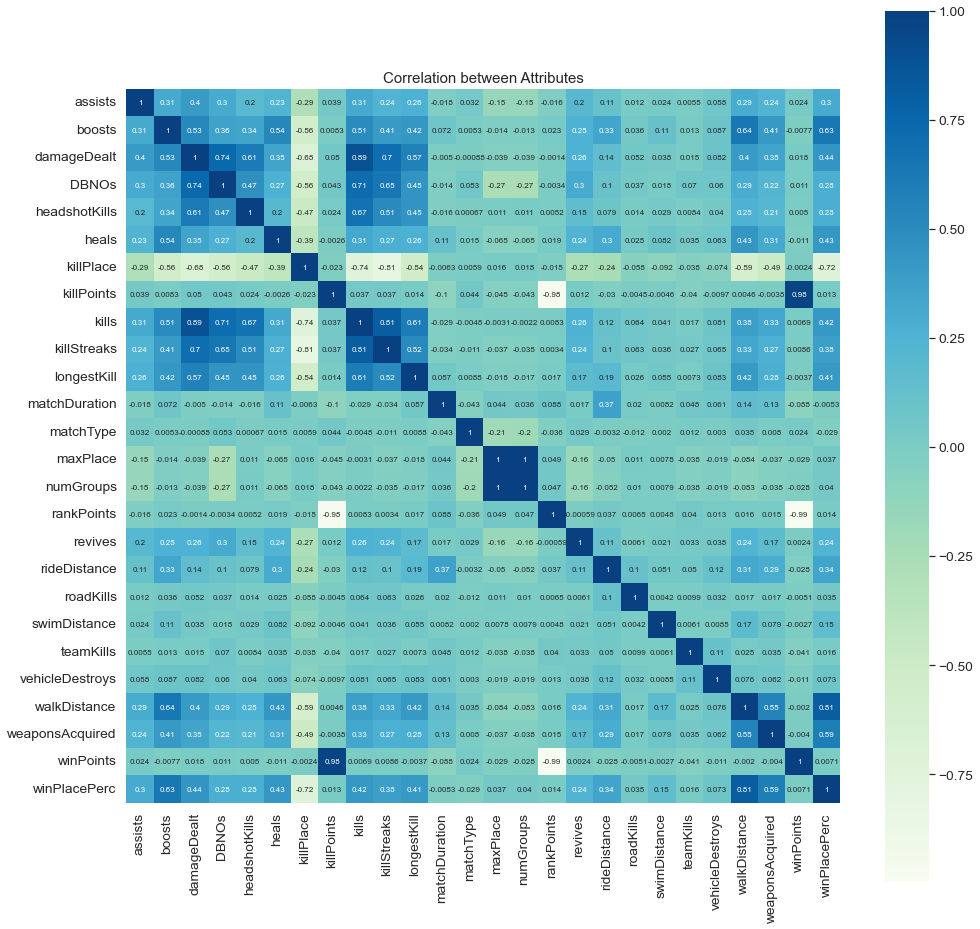

In [90]:
corr=data.corr()
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), square=True, cbar=True, annot=True,cmap='GnBu',annot_kws = {'size': 8})
plt.title('Correlation between Attributes')
plt.show()

In [94]:
# split data into train and test sets
x = data.drop(['winPlacePerc'],axis=1)
y = data['winPlacePerc']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)

#### LightBGM

In [99]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

params = {}
params['objective'] = 'regression'
params['metric'] = 'mae'

In [100]:
model = lgb.train(params, d_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.420678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2811
[LightGBM] [Info] Number of data points in the train set: 2977729, number of used features: 25
[LightGBM] [Info] Start training from score 0.472651


In [102]:
#Prediction
y_pred=model.predict(x_test)


In [113]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {}".format(mae))

MAE: 0.05952315163462747


In [114]:
y_pred.tolist()

[0.9973283435674052,
 0.3789778379021108,
 0.5214160964544273,
 0.7676789498223121,
 0.22905247538399945,
 0.8784731376829095,
 0.5425929809643335,
 0.9227466259227731,
 0.11970153333375641,
 0.20530026086464948,
 0.6728719437075341,
 0.35134633110459307,
 0.7958284772267656,
 0.8283207110294742,
 0.8813025317295191,
 0.08970745657709611,
 0.05485932849503827,
 0.4104017002314623,
 0.8222972653809635,
 0.058192840685452586,
 0.22525671965021596,
 0.7067022064345121,
 0.5787881392402681,
 0.4409273433183218,
 0.9154582707531469,
 0.7667292144287317,
 0.5086866874557776,
 0.5804791018179867,
 0.5286956002498513,
 0.2686603897420921,
 0.076905857859983,
 0.021865370508076652,
 0.8570851238006574,
 0.8548897568656604,
 0.36195015621753585,
 0.8984729082381191,
 0.684780882890475,
 0.9054773967087869,
 0.7791145513085277,
 0.14468374604248851,
 0.7765044568737405,
 0.29570226577692243,
 0.04705811676931505,
 0.40775781973151914,
 0.02670295031997648,
 0.8060827373488876,
 0.4391504305451494

#### Random Forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor
r_model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', n_jobs=-1)
r_model.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [106]:
pred = r_model.predict(x_test)
print('mae train: ', mean_absolute_error(pred, y_test))

mae train:  0.059121959816342086


In [110]:
pred.tolist()

[0.9739828373015873,
 0.3910236827985493,
 0.5599220275419023,
 0.7599418273809524,
 0.34401753652944284,
 0.8683617941086691,
 0.5537426045482293,
 0.9315317003968252,
 0.10740058025503077,
 0.2005836367322414,
 0.6835058026695527,
 0.36196970535714285,
 0.7416256503851543,
 0.8397923125000002,
 0.8464780684523812,
 0.0867049639180367,
 0.06256271102103914,
 0.40579988471373396,
 0.80947855501443,
 0.0659142822592116,
 0.22189705995061368,
 0.7121682837301588,
 0.5637472798913044,
 0.46373201226551214,
 0.896627915674603,
 0.8043029937770563,
 0.5226376526929815,
 0.5765319296497584,
 0.5558303991702742,
 0.2823475137191239,
 0.08461796074527994,
 0.016570791659944607,
 0.8837015699598603,
 0.8672960873015875,
 0.35021540422771674,
 0.8845717956349208,
 0.7278290029761905,
 0.9573028497315594,
 0.8224538183621932,
 0.11568907535968931,
 0.7200267691197693,
 0.29230686589105337,
 0.05144781103249342,
 0.3794762731543285,
 0.04542816471695455,
 0.8368276804898376,
 0.43988203571428575,


#### Conclusion

- Highly correlated variables with winPlacePerc:
    walkDistance(0.8)
    killPlace(-0.7)
    boosts(0.6)
    weaponsAcquired(0.6)
- 57% of players didnt have a single kill. 88% of players have only less than 3 kills
- If a player gets 3 or more health boosting boosts and healsm the chances are high
  that he\she gets more than 0.5 as winPlacePerc
- Less than 5 players in a team is ideal for an average winPlacePerc of more than 0.5

